In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, InputLayer, BatchNormalization

In [5]:
import matplotlib.pyplot as plt
from keras import utils as np_utils

In [6]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_treinamento.shape

(60000, 28, 28)

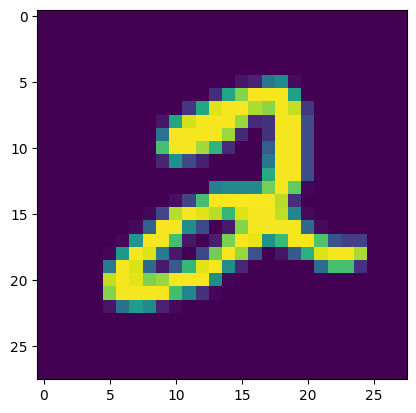

In [178]:
plt.imshow(X_treinamento[5])

In [102]:
X_treinamento.shape

(60000, 28, 28, 1)

In [103]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [104]:
X_treinamento.shape

(60000, 28, 28, 1)

In [105]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [106]:
X_treinamento /= 255
X_teste /= 255

In [100]:
X_treinamento.shape

(60000, 28, 28, 1)

In [13]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [14]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape=(28, 28, 1)))
rede_neural.add(Conv2D(32, (3, 3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))
rede_neural.add(Flatten())
rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dense(10, activation='softmax'))

In [15]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size=128, epochs=5, verbose=1, validation_data=(X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.8827 - loss: 0.4318 - val_accuracy: 0.9757 - val_loss: 0.0803
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9786 - loss: 0.0754 - val_accuracy: 0.9786 - val_loss: 0.0661
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9851 - loss: 0.0501 - val_accuracy: 0.9831 - val_loss: 0.0482
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9897 - loss: 0.0351 - val_accuracy: 0.9840 - val_loss: 0.0458
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9925 - loss: 0.0262 - val_accuracy: 0.9832 - val_loss: 0.0522


In [18]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9780 - loss: 0.0668


In [19]:
resultado

[0.0521661750972271, 0.9832000136375427]

In [20]:
from PIL import Image

In [169]:
from google.colab import files
uploaded = files.upload()

Saving clara.png to clara (1).png


In [170]:
# Substitua 'nome_da_imagem.png' pelo nome correto do arquivo carregado
img = Image.open('clara (1).png').convert('L')
img

In [171]:
img_array = np.array([img])
img_array.shape

(1, 28, 28)

In [172]:
img_array = img_array.reshape(img_array.shape[0], 28, 28, 1)
img_array = img_array.astype('float32')
img_array /= 255

In [173]:
img_array.shape

(1, 28, 28, 1)

In [174]:
previsao = rede_neural.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [175]:
previsao = previsao >0.5

In [176]:
indices = np.where(previsao)
resultado = int(indices[1])

<ipython-input-176-a9e197c57bd3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  resultado = int(indices[1])


In [177]:
print(f'Você desenhou um {resultado}')

Você desenhou um 6
